In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from keras.models import Sequential, load_model
from keras.datasets import cifar10
from keras.utils import np_utils,plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, Conv3D, MaxPool2D, MaxPool3D, Input
from sklearn.model_selection import train_test_split

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
y_test.shape

(10000, 1)

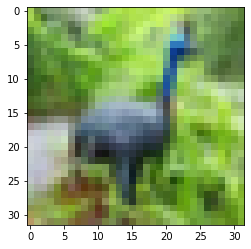

[2]


In [4]:
i=6
plt.imshow(X_train[i])
plt.show()
print(y_train[i])

<function matplotlib.pyplot.show(close=None, block=None)>

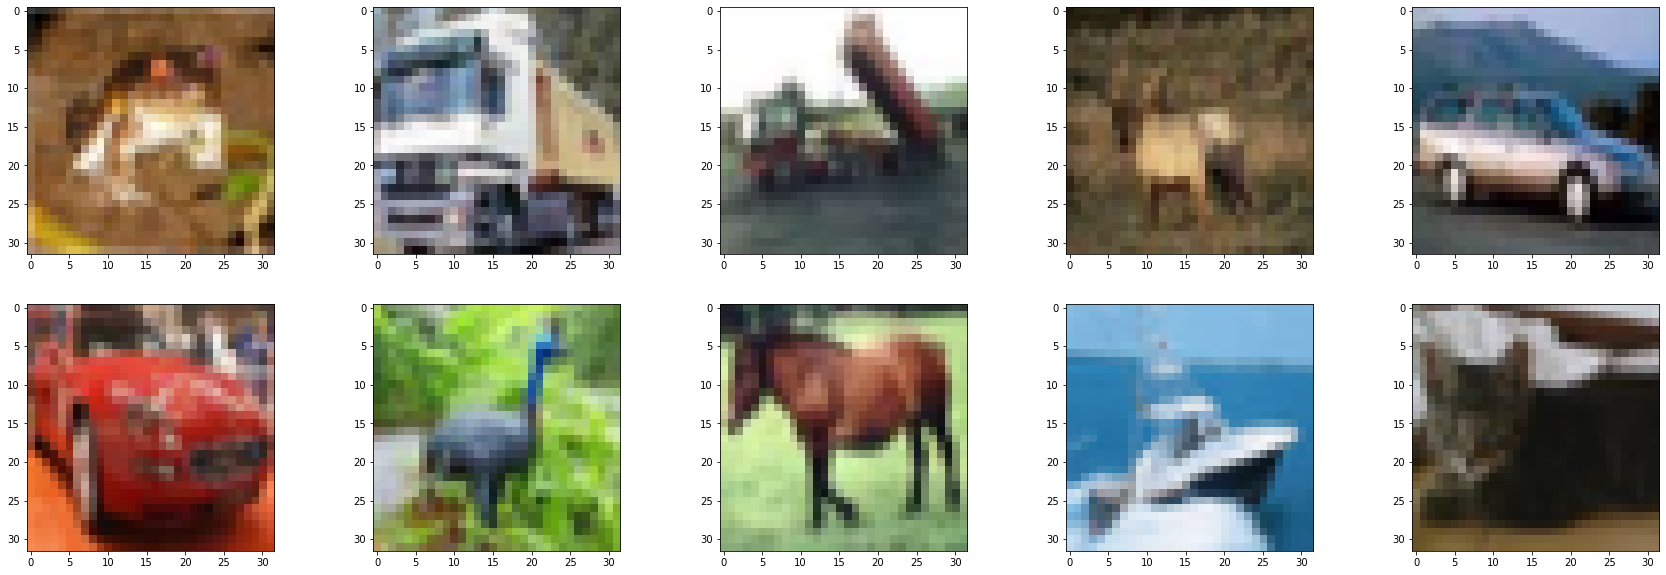

In [5]:
plt.figure(figsize=(30, 10))

for i in range(10):
    ax=plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
plt.show

## 5. Use ANN model

### 5.1 Prepare data for ANN

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train[:,0].shape

(50000,)

In [8]:
X_train_flat = np.reshape(X_train, newshape=[50000, 3072])
X_train_flat.shape

(50000, 3072)

In [9]:
Y_train_flat = np_utils.to_categorical(y_train)
print(Y_train_flat.shape, y_train.shape)

(50000, 10) (50000, 1)


In [10]:
X_train_flat, X_test_flat, Y_train_flat, Y_test_flat = \
train_test_split(X_train_flat, Y_train_flat, test_size=0.99, random_state = 2000)

### 5.2 build model

In [11]:
model = Sequential()
N_Features = X_train_flat.shape[1]
Nclasses = 10
model.add(Dense(N_Features, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(Nclasses, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## 5.3 Training

In [12]:
X_train_flat.shape

(500, 3072)

In [13]:
model.fit(X_train_flat, Y_train_flat, epochs = 10, batch_size = 500)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 149.5737 - accuracy: 0.1060
Epoch 2/10
1/1 [==============================] - 0s 252ms/step - loss: 2395.2649 - accuracy: 0.1080
Epoch 3/10
1/1 [==============================] - 0s 254ms/step - loss: 2299.2036 - accuracy: 0.1000
Epoch 4/10
1/1 [==============================] - 0s 267ms/step - loss: 3958.4409 - accuracy: 0.0840
Epoch 5/10
1/1 [==============================] - 0s 252ms/step - loss: 3036.8674 - accuracy: 0.0840
Epoch 6/10
1/1 [==============================] - 0s 242ms/step - loss: 3321.3911 - accuracy: 0.1220
Epoch 7/10
1/1 [==============================] - 0s 247ms/step - loss: 2783.7793 - accuracy: 0.1140
Epoch 8/10
1/1 [==============================] - 0s 250ms/step - loss: 2195.4004 - accuracy: 0.1060
Epoch 9/10
1/1 [==============================] - 0s 249ms/step - loss: 1616.3733 - accuracy: 0.1060
Epoch 10/10
1/1 [==============================] - 0s 253ms/step - loss: 1067.8715 - accuracy: 

# 6. CNN

## 6.1 Prepare Data

In [14]:
Y_train = np_utils.to_categorical(y_train)
print(Y_train.shape, y_train.shape)

(50000, 10) (50000, 1)


In [15]:
X_train_cnn, X_test_cnn, Y_train_cnn, Y_test_cnn = train_test_split(X_train, Y_train, test_size = 0.9, random_state = 2000)
print(X_train_cnn.shape, Y_train_cnn.shape)

(5000, 32, 32, 3) (5000, 10)


## 6.2 define model

In [16]:
activation1 = 'relu'
model = Sequential()
channel1 = 100
channel2 = 200
channel3 = 400
model.add(Conv2D(channel1, (9, 9), input_shape=(32, 32, 3), activation=activation1))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(channel1, (5, 5), activation=activation1))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(channel1, (3, 3), activation=activation1))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(channel3, activation=activation1))
model.add(Dropout(.5))
model.add(Dense(160, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
EPOCH = 5
start = time.time()
model.fit(X_train_cnn, Y_train_cnn, epochs = EPOCH, batch_size = 500, verbose = True)
print(time.time() - start)

Epoch 1/5
10/10 [==============================] - 9s 777ms/step - loss: 5.1448 - accuracy: 0.1074
Epoch 2/5
10/10 [==============================] - 9s 875ms/step - loss: 2.3044 - accuracy: 0.1156
Epoch 3/5
10/10 [==============================] - 12s 1s/step - loss: 2.2970 - accuracy: 0.1054
Epoch 4/5
10/10 [==============================] - 8s 797ms/step - loss: 2.2647 - accuracy: 0.1472
Epoch 5/5
10/10 [==============================] - 8s 802ms/step - loss: 2.2456 - accuracy: 0.1638
46.618770122528076
